<h1><center>Contextual Forest demo</center></h1>

In [16]:
from ContextualForest import *
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

This notebook contains example of all the basic functionality of the Contextual Forest model as well as some examples of
ideas illustrated in project's description.

In [8]:
# Loading a Wikipedia page as name appears in www.wikipedia.com/<name>

page = wiki.page('Python (programming language)')
page.text[:100]

'Python is an interpreted high-level general-purpose programming language. Its design philosophy emph'

In [9]:
# Disambiguation functionality
disambiguation('python')

['Colt Python',
 'Monty Python',
 'PYTHON',
 'Python (Busch Gardens Tampa Bay)',
 'Python (Coney Island, Cincinnati, Ohio)',
 'Python (Efteling)',
 'Python (Ford prototype)',
 'Python (Monty) Pictures',
 'Python (automobile maker)',
 'Python (film)',
 'Python (genus)',
 'Python (missile)',
 'Python (mythology)',
 'Python (nuclear primary)',
 'Python (painter)',
 'Python (programming language)',
 'Python Anghelo',
 'Python of Aenus',
 'Python of Byzantium',
 'Python of Catana',
 'Pythons']

In [12]:
# Python's page statistical dictionary with set relevance

stats_dic = set_relevance(*stem_text(page.text))

# Top 10 most relevan words

most_relevant = sorted(stats_dic.keys(), key=lambda k : stats_dic[k]['relevance'], reverse=True)
most_relevant[:10]

[('python', 'PROPN'),
 ('languag', 'NOUN'),
 ('program', 'NOUN'),
 ('includ', 'VERB'),
 ('code', 'NOUN'),
 ('oper', 'NOUN'),
 ('express', 'NOUN'),
 ('statement', 'NOUN'),
 ('function', 'NOUN'),
 ('standard', 'ADJ')]

In [18]:
# The Zipf distribution

N = 100 # Number of words to represent



p1 = wiki.page("Steve Jobs") # example page
dic = set_relevance(*stem_text(p1.text)) #stats dict


y_data = np.array(sorted([dic[key]["relevance"] for key in dic], reverse=True))[:N] # top n words
y_data = y_data[y_data != 0] # different than 0
x_data = np.linspace(1,len(y_data),len(y_data)) # word ranking indexes

#Zipf distribution
def zipf(x,alpha): 
    return (y_data[0] / (x)**alpha )

#Fitting Zipf's hyperparameter
z_popt, z_pcov = curve_fit(zipf,x_data,y_data)

Zipf ECM: 0.00061


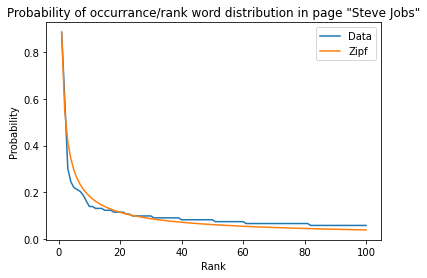

In [19]:
plt.plot(x_data,y_data,label="Data")
pred = zipf(x_data,*z_popt)
plt.plot(x_data,pred,label="Zipf")
print("Zipf ECM:",np.mean((y_data - pred)**2).round(5))
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Probability")
plt.title("Probability of occurrance/rank word distribution in page \"Steve Jobs\"")
plt.show()

In [22]:
# A forest object
f1 = Forest(["apple","microsoft"])

# disambiguation
f1.disambiguate()

# recover
f1.recover_words()

# a disambiguated Node object
node = f1.dic['apple']

#disambiguated page
print(node.page.text[:100])

#top 10 links
top_links = sorted(node.page.links, key=lambda l: node.link_relevance(l), reverse=True)
top_links[:10]

Apple Inc. is an American multinational technology company that specializes in consumer electronics,


['IPhone',
 'Technology company',
 'Consumer',
 'Computer software',
 'Software',
 'IPad',
 'IOS',
 'Personal computer',
 'Personal computing',
 'Steve Jobs']

['IPhone',
 'Technology company',
 'Consumer',
 'Computer software',
 'Software',
 'IPad',
 'IOS',
 'Personal computer',
 'Personal computing',
 'Steve Jobs']

In [66]:
# Complete algorithm example
fr = contextual_forest("Queen redefined rock with their songs")

# Print results
for word, node in fr.dic.items():
    possible_meanings = len(disambiguation(word))
    if not possible_meanings:
        #no disambiguation page
        possible_meanings = 1
    print(f"Word: {word}\t possible meanings: {possible_meanings}\n Choosen: {node.page.text[:100]} ...")

Word: rock	 possible meanings: 49
 Choosen: Rock music is a broad genre of popular music that originated as "rock and roll" in the United States ...
Word: songs	 possible meanings: 1
 Choosen: A song is a musical composition intended to be performed by the human voice. This is often done at d ...
Word: queen	 possible meanings: 40
 Choosen: Queen are a British rock band formed in London in 1970. Their classic line-up was Freddie Mercury (l ...
